<a href="https://colab.research.google.com/github/bhavana1253/deepLearning/blob/main/stockPrediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stock Price prediction using RNN

In [1]:
#!sudo update-alternatives --config python3

In [2]:
!pip list -v

Package                       Version                Location                               Installer
----------------------------- ---------------------- -------------------------------------- ---------
absl-py                       1.3.0                  /usr/local/lib/python3.7/dist-packages pip
aeppl                         0.0.33                 /usr/local/lib/python3.7/dist-packages pip
aesara                        2.7.9                  /usr/local/lib/python3.7/dist-packages pip
aiohttp                       3.8.3                  /usr/local/lib/python3.7/dist-packages pip
aiosignal                     1.3.1                  /usr/local/lib/python3.7/dist-packages pip
alabaster                     0.7.12                 /usr/local/lib/python3.7/dist-packages pip
albumentations                1.2.1                  /usr/local/lib/python3.7/dist-packages pip
altair                        4.2.0                  /usr/local/lib/python3.7/dist-packages pip
appdirs                     

In [3]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#!pip install tensorflow==2.1
#!pip install keras==2.3.1

In [5]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import tensorflow
from tensorflow import keras 
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data
from sklearn.metrics import mean_absolute_percentage_error
from keras import optimizers
from keras.callbacks import EarlyStopping

import math 
import numpy as np 
import pandas as pd
from datetime import date, timedelta, datetime 
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout, SimpleRNN, GRU
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})
import datetime
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
!python --version 

Python 3.7.15


I use pandas-datareader to get the historical stock prices from Yahoo! finance. For this example, I get only the historical data till the end of training_end_data.

#Helper functions 

### Taking Microsoft  and Apple company shares for our prediction today as Microsoft and Apple are my dream company to work

In [8]:
def random_seed(seed = 1840815):
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.keras.utils.set_random_seed(seed)
random_seed()

In [9]:

company=['AAPL''MSFT']


start_date = '2010-01-01'
end_date =  date.today().strftime("%Y-%m-%d")

tickers = 'AAPL'
df_apple= data.get_data_yahoo(tickers,start_date,end_date)

tickers = 'MSFT'
df_microsoft= data.get_data_yahoo(tickers,start_date,end_date)


In [10]:
df_apple.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526477
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410792
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.453412
2010-01-11,7.607143,7.444643,7.600000,7.503929,462229600.0,6.396484
2010-01-12,7.491786,7.372143,7.471071,7.418571,594459600.0,6.323722
2010-01-13,7.533214,7.289286,7.423929,7.523214,605892000.0,6.412922
2010-01-14,7.516429,7.465000,7.503929,7.479643,432894000.0,6.375781


In [11]:
df_apple.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-10,146.869995,139.500000,141.240005,146.869995,118854000.0,146.869995
2022-11-11,150.009995,144.369995,145.820007,149.699997,93903800.0,149.699997
2022-11-14,150.279999,147.429993,148.970001,148.279999,73374100.0,148.279999
2022-11-15,153.589996,148.559998,152.220001,150.039993,89868300.0,150.039993
2022-11-16,149.869995,147.289993,149.130005,148.789993,64218300.0,148.789993
2022-11-17,151.479996,146.149994,146.429993,150.720001,80389400.0,150.720001
2022-11-18,152.699997,149.970001,152.309998,151.289993,74794600.0,151.289993
2022-11-21,150.369995,147.720001,150.160004,148.009995,58724100.0,148.009995
2022-11-22,150.419998,146.929993,148.130005,150.179993,51804100.0,150.179993


In [12]:
df_apple.shape

(3247, 6)

<Figure size 1440x720 with 0 Axes>

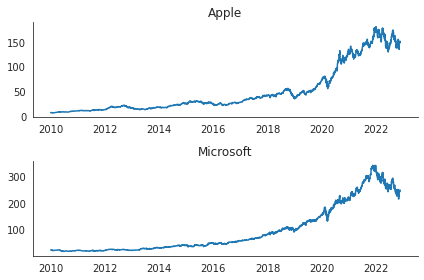

In [13]:
plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(2)
axs[0].plot(df_apple['Adj Close'])

axs[0].set_title("Apple")


axs[1].plot(df_microsoft['Adj Close'])
axs[1].set_title("Microsoft")

plt.tight_layout()

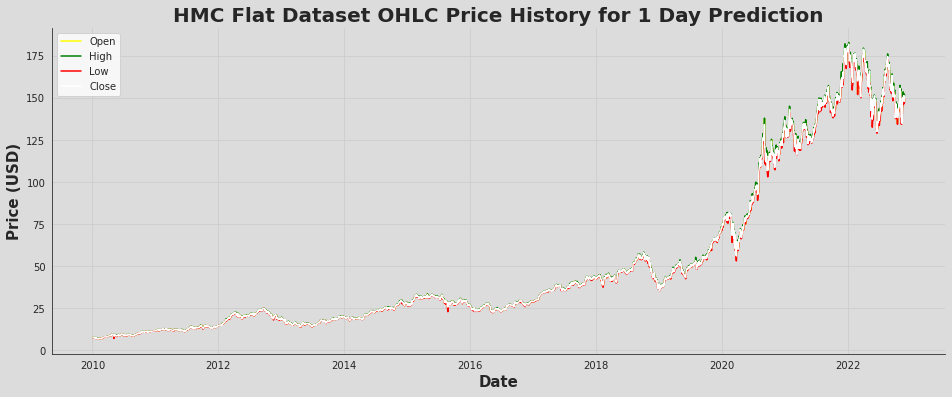

In [14]:
#plt.figure()
df1=df_apple
plt.figure(figsize = (16,6), facecolor = '#dcdcdc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcdcdc')
plt.plot(df1["Open"], color = 'yellow')
plt.plot(df1["High"], color = 'green')
plt.plot(df1["Low"], color = 'red')
plt.plot(df1["Close"],color = 'white')
plt.title('HMC Flat Dataset OHLC Price History for 1 Day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', fontsize=15,fontweight = "bold")
plt.xlabel('Date',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

Since we are considering only Close price, We will check the close column

Check the working business days and get the dates for that

In [15]:
all_bussinessdays = pd.date_range(start=start_date, end=end_date, freq='B')
print(all_bussinessdays)

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17',
               '2022-11-18', '2022-11-21', '2022-11-22', '2022-11-23',
               '2022-11-24', '2022-11-25'],
              dtype='datetime64[ns]', length=3366, freq='B')


In [16]:
close_prices = df_apple.reindex(all_bussinessdays)
close_prices = df_apple.fillna(method='ffill')

In [17]:
close_prices.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-10,146.869995,139.500000,141.240005,146.869995,118854000.0,146.869995
2022-11-11,150.009995,144.369995,145.820007,149.699997,93903800.0,149.699997
2022-11-14,150.279999,147.429993,148.970001,148.279999,73374100.0,148.279999
2022-11-15,153.589996,148.559998,152.220001,150.039993,89868300.0,150.039993
2022-11-16,149.869995,147.289993,149.130005,148.789993,64218300.0,148.789993
2022-11-17,151.479996,146.149994,146.429993,150.720001,80389400.0,150.720001
2022-11-18,152.699997,149.970001,152.309998,151.289993,74794600.0,151.289993
2022-11-21,150.369995,147.720001,150.160004,148.009995,58724100.0,148.009995
2022-11-22,150.419998,146.929993,148.130005,150.179993,51804100.0,150.179993


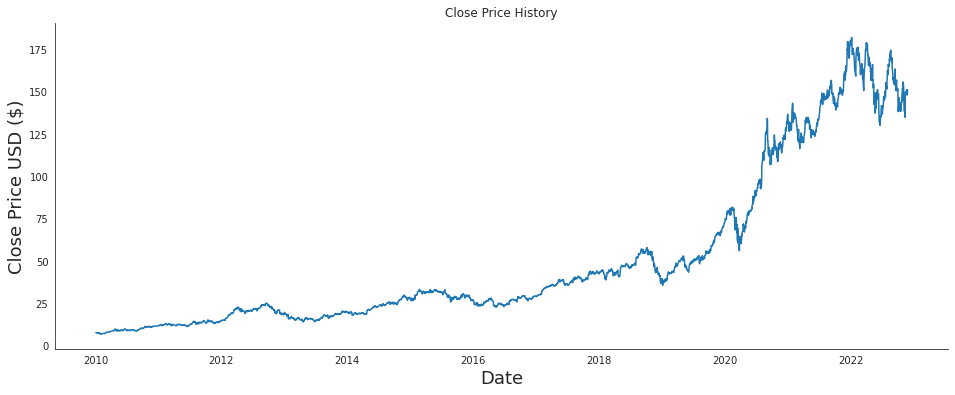

In [18]:
data = np.array(close_prices["Close"]).reshape(-1, 1)

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_apple['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Lets apply Min-Max scalar

In [19]:
TRAIN_SIZE=0.9
def get_seq_data_temp(prediction_days_in_future, window_size,index_Close,data):
    x = []
    y = []

    # Fetch 'WINDOW_SIZE' values as x and the value 'PREDICTION_TARGET' days later as y
    # Slide this window across all days to maximise values
    for i in range(window_size, len(data)-prediction_days_in_future):
        x.append(data[i-window_size:i,:])
        y.append(data[i+prediction_days_in_future-1, index_Close])

    x = np.array(x)
    y = np.array(y)
    
    n_training_samples = int(len(y) * TRAIN_SIZE)
    X_train = x[:n_training_samples, :]
    y_train = y[:n_training_samples]
    X_test = x[n_training_samples:, :]
    y_test = y[n_training_samples:]
    
    return X_train, y_train, X_test, y_test, n_training_samples

  
def plot_curve(history, epochs):
    training_loss = history.history["loss"]
    validation_loss = history.history["val_loss"]
    epochs_list = range(epochs)
    plt.plot(epochs_list, training_loss, label='Training')
    plt.plot(epochs_list, validation_loss, label='Validation')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss curve')
    plt.show()

def plot_results(train, output):
    plt.figure(figsize=(16,6))
    plt.title('Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(output[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.title("Stock Price Prediction")
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

## **Model 1: Univariate LSTM**

# predicting Close Price for next 1 day Using last 60days historical data 

In [20]:
from pandas.core import window
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

# Setting up an early stop
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

def fit_model_lstm_univariate(days_in_future, window_size,pred_index,learning_rate,trainX,trainY,testX,testY,data,scaler,opt,num_epochs=50):
    print(f"Predicting for {days_in_future} days in future...")
    hl = [40,35]
    lr = learning_rate
    batch_size = 64
 

    #scaler=MinMaxScaler()
    #df=scaler.fit_transform(np.array(data).reshape(-1,1))

    data_filtered_ext = data.copy()
    data_filtered_ext['Prediction'] = data_filtered_ext
    scaler_pred = scaler
    optimizer=None
    if opt==0:
      optimizer = optimizers.Adam(lr=learning_rate)
    else:
      optimizer=opt      
    
    #optimizers = optimizers.Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(1,input_shape = (trainX.shape[1],1),return_sequences = True, activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = optimizer, loss = 'mean_squared_error')
    print(model.summary())
  
    # Training the data
    #history = model.fit(X_train,y_train,epochs = 20, batch_size = batch_size, validation_data = (X_test, y_test))

    history = model.fit(trainX,trainY,epochs = num_epochs, batch_size = batch_size,validation_data=(testX,testY))
    print(history)
    plot_curve(history, num_epochs)
    
    y_pred_scaled = model.predict(testX)
    #print(y_pred_scaled)

    # Unscale the predicted values
    y_pred = scaler_pred.inverse_transform(y_pred_scaled)
    y_test_unscaled = scaler_pred.inverse_transform(testY.reshape(-1, 1))

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test_unscaled, y_pred)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100

    # Median Absolute Percentage Error (MDAPE)
    mdape = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
    mse = mean_squared_error(y_test_unscaled, y_pred)


    plot_data(testY,y_pred_scaled)
    
    
    plt.figure(figsize = (16,6), facecolor = '#faebd7')
    #plt.plot(x,y)
    ax = plt.axes()
    ax.set_facecolor('#faebd7')
    #plt.figure(figsize=(16,8))
    plt.plot(y_test_unscaled, color = 'blue', label = 'Real HMC Stock Price')
    plt.plot(y_pred, color = 'red', label = ' Stock Price Prediction For 1 Day')
    plt.title('HMC Actual vs RNN Prediction for 1 Day', fontsize = 20,fontweight = "bold")
    plt.xlabel('Date', fontsize = 18,fontweight = "bold")
    plt.ylabel('HMC Close Price ($)', fontsize = 18,fontweight = "bold")
    plt.legend()
    plt.grid()
    plt.show
    #plot_results(data_filtered_ext, y_pred)
    return {
        'epochs': num_epochs,
        'batch_size': batch_size,
        'learning rate':lr,
        'sequence_length': window_size,
        'mae': mae,
        'mape': mape,
        'mdape': mdape,
        'mse': mse
        }

    

In [21]:
from sklearn.preprocessing import MinMaxScaler

data = close_prices.copy()

data = data['Close']

random_seed()
scaler = MinMaxScaler()
df_data=scaler.fit_transform(np.array(data).reshape(-1,1))
X_train, y_train, X_test, y_test, n_training_samples = get_seq_data_temp(2, 30,0,df_data)
#y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
print("Train samples:", len(y_train), "Test samples:", len(y_test))
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)



Train samples: 2893 Test samples: 322
Train shape: (2893, 30, 1) Test shape: (322, 30, 1)


Predicting for 2 days in future...


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 1)             12        
                                                                 
 lstm_1 (LSTM)               (None, 30, 40)            6720      
                                                                 
 lstm_2 (LSTM)               (None, 35)                10640     
                                                                 
 dense (Dense)               (None, 1)                 36        
                                                                 
Total params: 17,408
Trainable params: 17,408
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
46/46 [==============================] - 10s 146ms/step - loss: 0.0429 - val_loss: 0.3625
Epoch 2/50
46/46 [==============================] - 7s 163ms/step - loss: 0.03

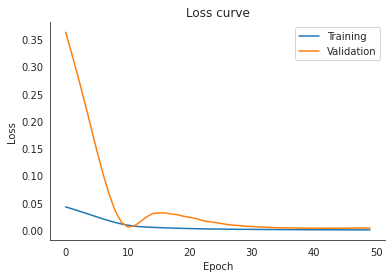

11/11 [==============================] - 0s 14ms/step


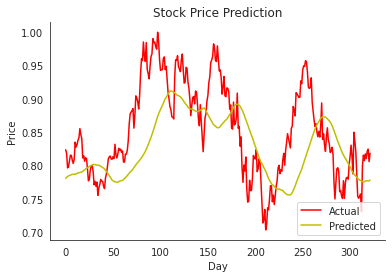

{'epochs': 50, 'batch_size': 64, 'learning rate': 1e-05, 'sequence_length': 30, 'mae': 9.156594649605129, 'mape': 5.75275531729797, 'mdape': 4.685824216377059, 'mse': 127.99249476221063}


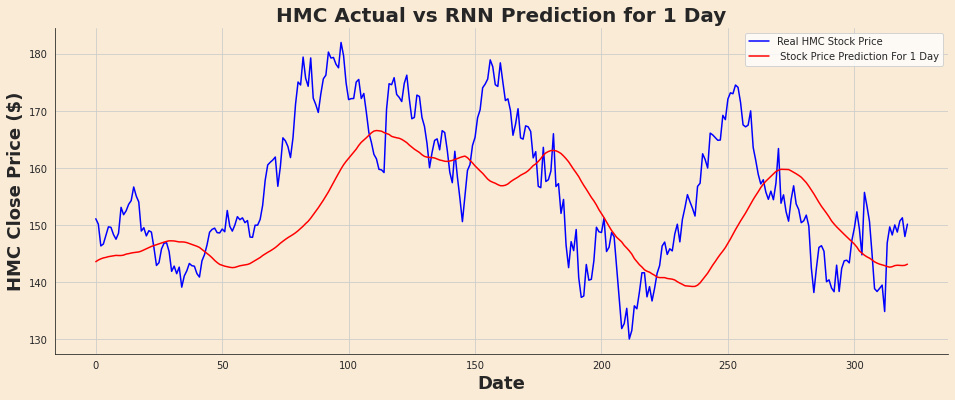

In [22]:
result_list=[]



result = fit_model_lstm_univariate(days_in_future=2, window_size=30,pred_index=0,learning_rate=0.00001,
                                   trainX=X_train,trainY=y_train,testX=X_test,testY=y_test,
                                   data=data,scaler=scaler,opt=0)
result_list.append(result)
print(result)

# **Model1-Univariate LSTM- Experimet1- Different Learning rate**

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


0.001
Predicting for 2 days in future...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 1)             12        
                                                                 
 lstm_4 (LSTM)               (None, 30, 40)            6720      
                                                                 
 lstm_5 (LSTM)               (None, 35)                10640     
                                                                 
 dense_1 (Dense)             (None, 1)                 36        
                                                                 
Total params: 17,408
Trainable params: 17,408
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
46/46 [==============================] - 9s 131ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 2/50
46/46 [==================

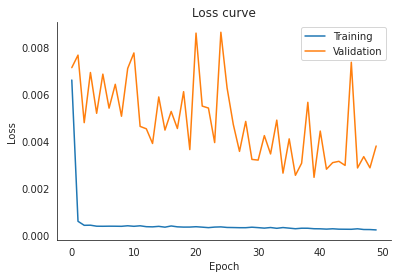

11/11 [==============================] - 0s 12ms/step


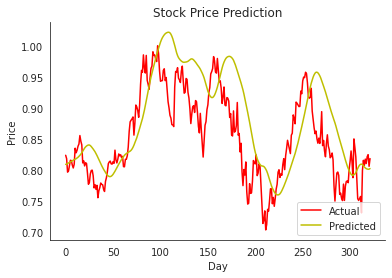

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


{'epochs': 50, 'batch_size': 64, 'learning rate': 0.001, 'sequence_length': 30, 'mae': 8.788717660844696, 'mape': 5.676727192984342, 'mdape': 5.184637800468939, 'mse': 116.5680706274084}
0.0001
Predicting for 2 days in future...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 1)             12        
                                                                 
 lstm_7 (LSTM)               (None, 30, 40)            6720      
                                                                 
 lstm_8 (LSTM)               (None, 35)                10640     
                                                                 
 dense_2 (Dense)             (None, 1)                 36        
                                                                 
Total params: 17,408
Trainable params: 17,408
Non-trainable params: 0
___________________

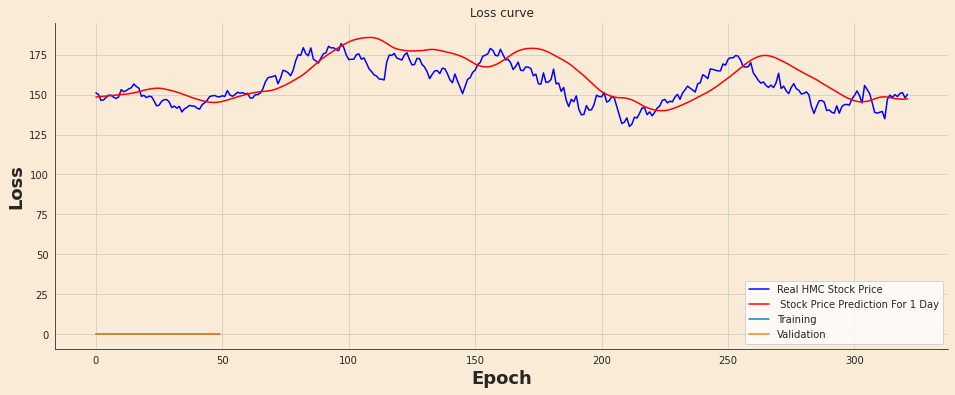

11/11 [==============================] - 0s 13ms/step


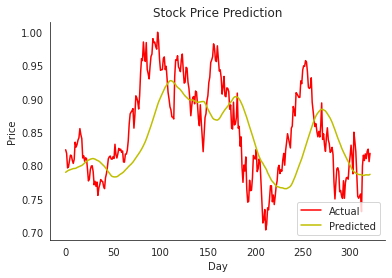

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


{'epochs': 50, 'batch_size': 64, 'learning rate': 0.0001, 'sequence_length': 30, 'mae': 8.451878375888612, 'mape': 5.35140387395784, 'mdape': 4.2738938551553085, 'mse': 107.3817577840513}
1e-05
Predicting for 2 days in future...


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 1)             12        
                                                                 
 lstm_10 (LSTM)              (None, 30, 40)            6720      
                                                                 
 lstm_11 (LSTM)              (None, 35)                10640     
                                                                 
 dense_3 (Dense)             (None, 1)                 36        
                                                                 
Total params: 17,408
Trainable params: 17,408
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
46/46 [==============================] - 9s 126ms/step - loss: 0.0429 - val_loss: 0.3625
Epoch 2/50
46/46 [==============================] - 5s 118ms/step - loss: 0.0

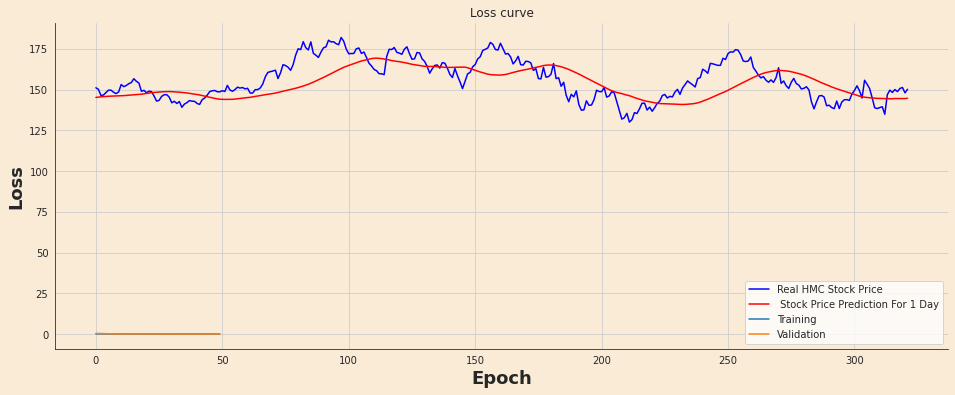

11/11 [==============================] - 0s 12ms/step


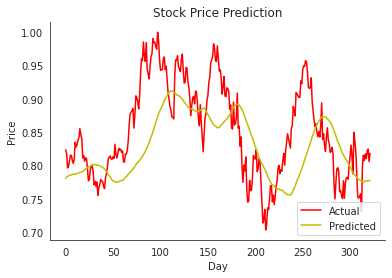

{'epochs': 50, 'batch_size': 64, 'learning rate': 1e-05, 'sequence_length': 30, 'mae': 9.156582992269385, 'mape': 5.752751711321182, 'mdape': 4.685755137085601, 'mse': 127.99189823792499}


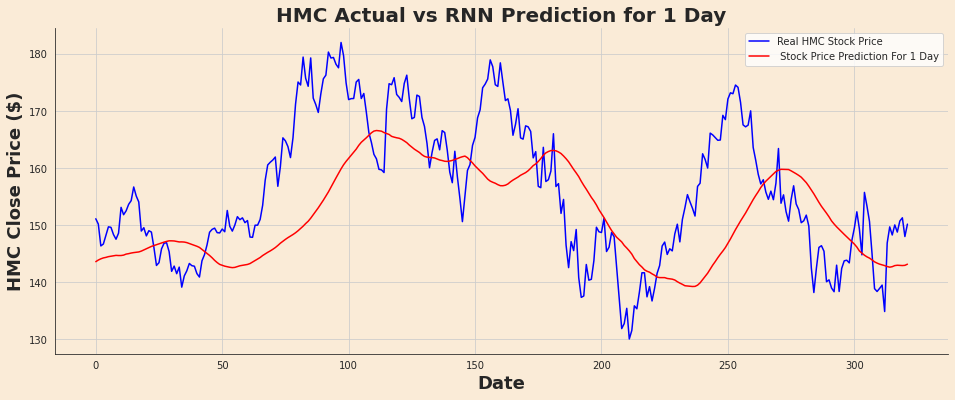

In [23]:
# Prediction Index
result_list =[]
learning_rate = [0.001, 0.0001, 0.00001]
for lr in learning_rate:
  random_seed()
  print(lr)
  data=close_prices.copy()
  data=data['Close']
  scaler = MinMaxScaler()
  df_data=scaler.fit_transform(np.array(data).reshape(-1,1))
  X_train, y_train, X_test, y_test, n_training_samples = get_seq_data_temp(2, 30,0,df_data)
  result = fit_model_lstm_univariate(days_in_future=2, window_size=30,pred_index=0,learning_rate=lr,
                                   trainX=X_train,trainY=y_train,testX=X_test,testY=y_test,
                                   data=data,scaler=scaler,opt=0)
  result_list.append(result)
  print(result)
  



In [24]:
model1_univariate_exp1=pd.DataFrame(result_list)
model1_univariate_exp1

,epochs,batch_size,learning rate,sequence_length,mae,mape,mdape,mse
0,50,64,0.00100,30,8.788718,5.676727,5.184638,116.568071
1,50,64,0.00010,30,8.451878,5.351404,4.273894,107.381758
2,50,64,0.00001,30,9.156583,5.752752,4.685755,127.991898


# **Model1- Univariate LSTM - Experimet2- Different Optimizers**

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adagrad.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Predicting for 2 days in future...
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 1)             12        
                                                                 
 lstm_13 (LSTM)              (None, 30, 40)            6720      
                                                                 
 lstm_14 (LSTM)              (None, 35)                10640     
                                                                 
 dense_4 (Dense)             (None, 1)                 36        
                                                                 
Total params: 17,408
Trainable params: 17,408
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
46/46 [==============================] - 8s 130ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 2/50
46/46 [========================

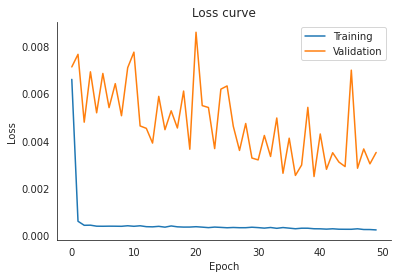

11/11 [==============================] - 0s 12ms/step


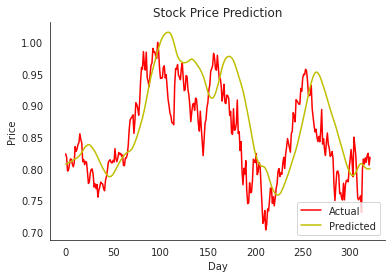

{'epochs': 50, 'batch_size': 64, 'learning rate': 0.001, 'sequence_length': 30, 'mae': 8.481196243570459, 'mape': 5.476519766183394, 'mdape': 4.928686055922175, 'mse': 107.68389573347211, 'optimizer': <keras.optimizers.optimizer_v2.adam.Adam object at 0x7f12d75d37d0>}
Predicting for 2 days in future...
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 1)             12        
                                                                 
 lstm_16 (LSTM)              (None, 30, 40)            6720      
                                                                 
 lstm_17 (LSTM)              (None, 35)                10640     
                                                                 
 dense_5 (Dense)             (None, 1)                 36        
                                                                 
Total params: 

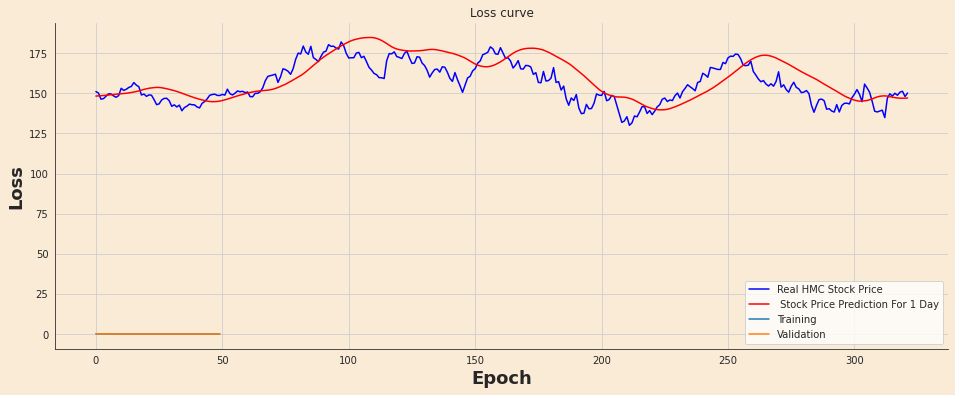

11/11 [==============================] - 0s 13ms/step


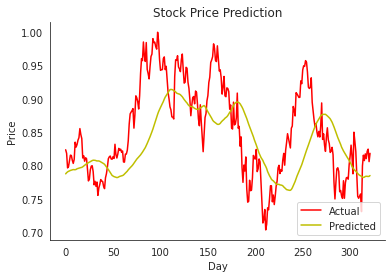

{'epochs': 50, 'batch_size': 64, 'learning rate': 0.001, 'sequence_length': 30, 'mae': 8.910307511039402, 'mape': 5.619993158294196, 'mdape': 4.473153299931102, 'mse': 120.31960793576341, 'optimizer': <keras.optimizers.optimizer_v2.adagrad.Adagrad object at 0x7f12d596fad0>}
Predicting for 2 days in future...
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 1)             12        
                                                                 
 lstm_19 (LSTM)              (None, 30, 40)            6720      
                                                                 
 lstm_20 (LSTM)              (None, 35)                10640     
                                                                 
 dense_6 (Dense)             (None, 1)                 36        
                                                                 
Total pa

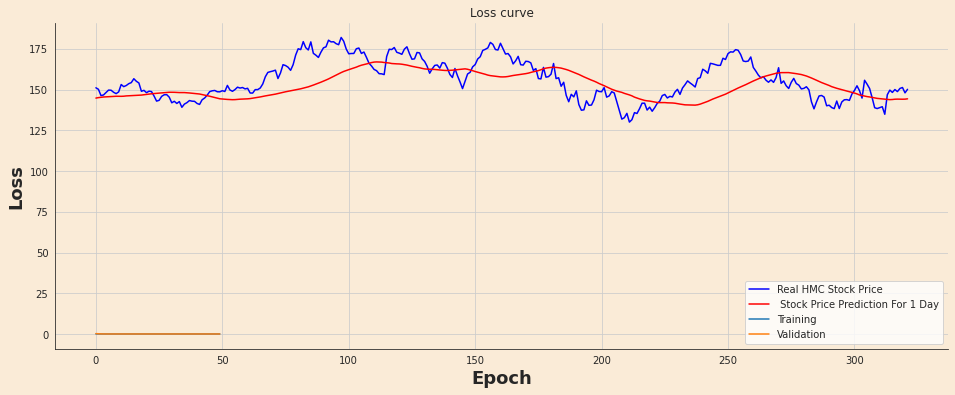

11/11 [==============================] - 0s 13ms/step


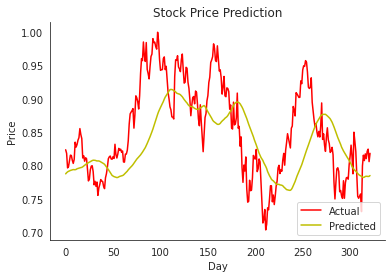

{'epochs': 50, 'batch_size': 64, 'learning rate': 0.001, 'sequence_length': 30, 'mae': 8.910306089413092, 'mape': 5.619992448146386, 'mdape': 4.473153666597496, 'mse': 120.31959692806421, 'optimizer': <keras.optimizers.optimizer_v2.adagrad.Adagrad object at 0x7f12d596fad0>}


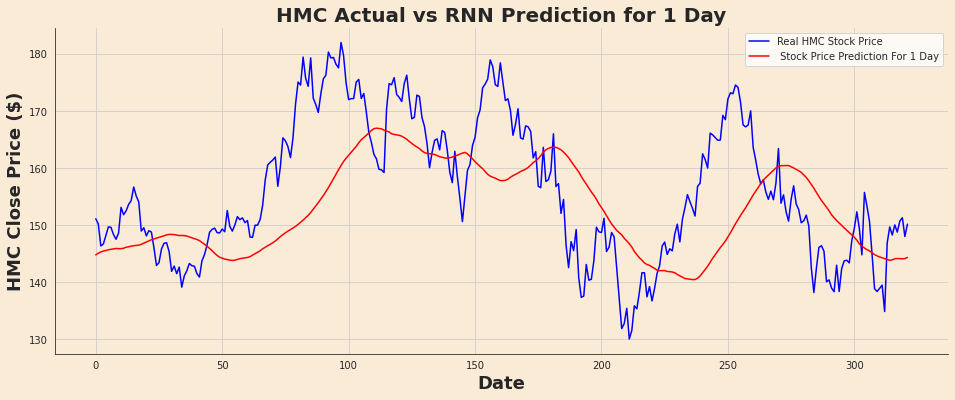

In [25]:

optimizer1= optimizers.Adam(lr=0.00100)
optimizer2= optimizers.SGD(lr=0.00100)
optimizer2=optimizers.Adagrad(lr=0.00100)
optimizer_list=[optimizer1,optimizer2,optimizer2]
# Prediction Index
result_list =[]
learning_rate = [ 0.00100]
for optimizer in optimizer_list:
  random_seed()
  data=close_prices.copy()
  data=data['Close']
  scaler = MinMaxScaler()
  df_data=scaler.fit_transform(np.array(data).reshape(-1,1))
  X_train, y_train, X_test, y_test, n_training_samples = get_seq_data_temp(2, 30,0,df_data)
  df_data=scaler.fit_transform(np.array(data).reshape(-1,1))
  result = fit_model_lstm_univariate(days_in_future=2, window_size=30,pred_index=0,learning_rate=0.00100,
                                   trainX=X_train,trainY=y_train,testX=X_test,testY=y_test,
                                   data=data,scaler=scaler,opt=optimizer)
  result['optimizer']=optimizer
  result_list.append(result)
  print(result)

In [26]:
model1_univariate_exp2=pd.DataFrame(result_list)
model1_univariate_exp2

,epochs,batch_size,learning rate,sequence_length,mae,mape,mdape,mse,optimizer
0,50,64,0.001,30,8.481196,5.476520,4.928686,107.683896,<keras.optimizers.optimizer_v2.adam.Adam objec...
1,50,64,0.001,30,8.910308,5.619993,4.473153,120.319608,<keras.optimizers.optimizer_v2.adagrad.Adagrad...
2,50,64,0.001,30,8.910306,5.619992,4.473154,120.319597,<keras.optimizers.optimizer_v2.adagrad.Adagrad...


# **Model1-Univariate LSTM-Experimet3- Diffferent Epochs**

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Predicting for 2 days in future...
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 30, 1)             12        
                                                                 
 lstm_22 (LSTM)              (None, 30, 40)            6720      
                                                                 
 lstm_23 (LSTM)              (None, 35)                10640     
                                                                 
 dense_7 (Dense)             (None, 1)                 36        
                                                                 
Total params: 17,408
Trainable params: 17,408
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
46/46 [==============================] - 9s 130ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 2/50
46/46 [========================

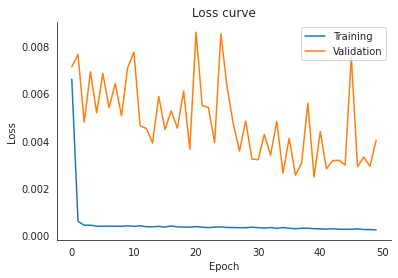

11/11 [==============================] - 0s 12ms/step


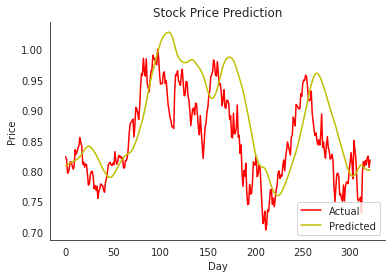

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


{'epochs': 50, 'batch_size': 64, 'learning rate': 0.001, 'sequence_length': 30, 'mae': 9.024281993415785, 'mape': 5.825096487151466, 'mdape': 5.214834371174949, 'mse': 123.64005592148621, 'Model Name': 'Univariate LSTM-Exp3'}
Predicting for 2 days in future...
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 30, 1)             12        
                                                                 
 lstm_25 (LSTM)              (None, 30, 40)            6720      
                                                                 
 lstm_26 (LSTM)              (None, 35)                10640     
                                                                 
 dense_8 (Dense)             (None, 1)                 36        
                                                                 
Total params: 17,408
Trainable params: 17,408
Non-trainab

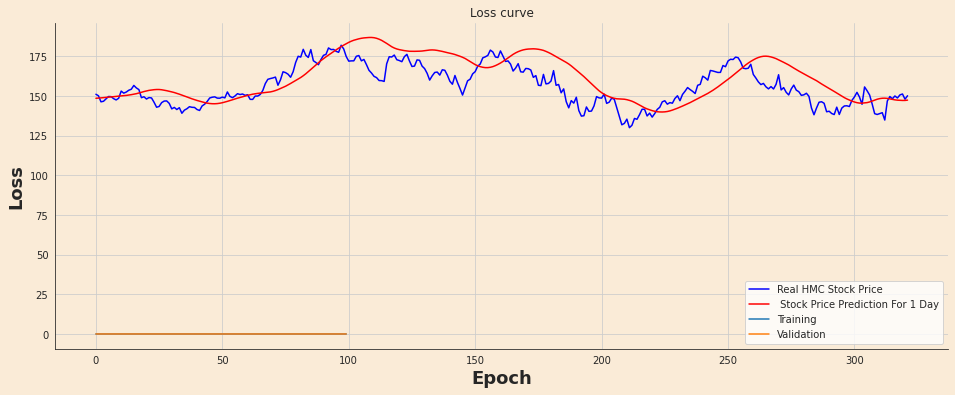

11/11 [==============================] - 0s 13ms/step


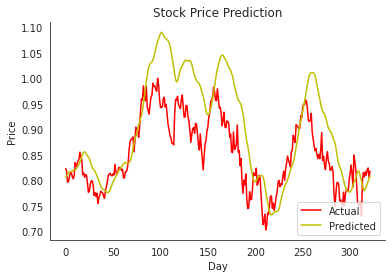

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


{'epochs': 100, 'batch_size': 64, 'learning rate': 0.001, 'sequence_length': 30, 'mae': 9.971488715699, 'mape': 6.333557045702778, 'mdape': 4.931922427397457, 'mse': 164.48021557631537, 'Model Name': 'Univariate LSTM-Exp3'}
Predicting for 2 days in future...
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 30, 1)             12        
                                                                 
 lstm_28 (LSTM)              (None, 30, 40)            6720      
                                                                 
 lstm_29 (LSTM)              (None, 35)                10640     
                                                                 
 dense_9 (Dense)             (None, 1)                 36        
                                                                 
Total params: 17,408
Trainable params: 17,408
Non-trainable

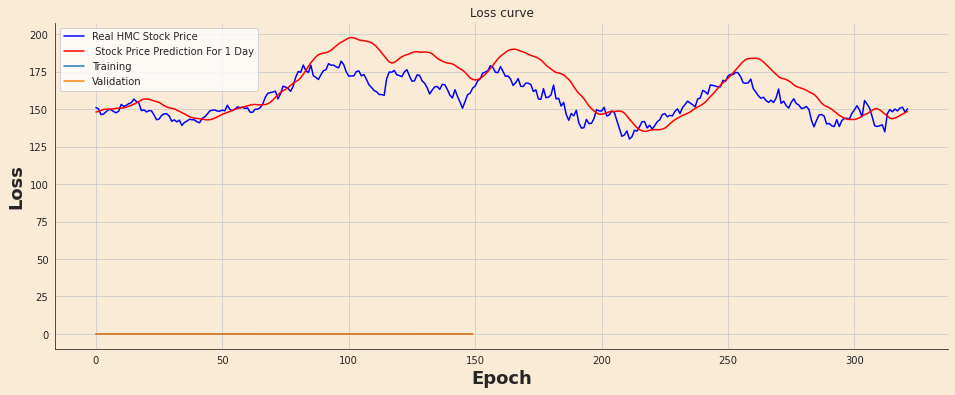

11/11 [==============================] - 0s 13ms/step


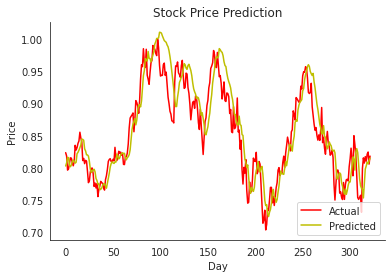

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


{'epochs': 150, 'batch_size': 64, 'learning rate': 0.001, 'sequence_length': 30, 'mae': 4.494352020832323, 'mape': 2.8675027629549996, 'mdape': 2.4131550888863673, 'mse': 31.91608158142309, 'Model Name': 'Univariate LSTM-Exp3'}
Predicting for 2 days in future...
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 30, 1)             12        
                                                                 
 lstm_31 (LSTM)              (None, 30, 40)            6720      
                                                                 
 lstm_32 (LSTM)              (None, 35)                10640     
                                                                 
 dense_10 (Dense)            (None, 1)                 36        
                                                                 
Total params: 17,408
Trainable params: 17,408
Non-trai

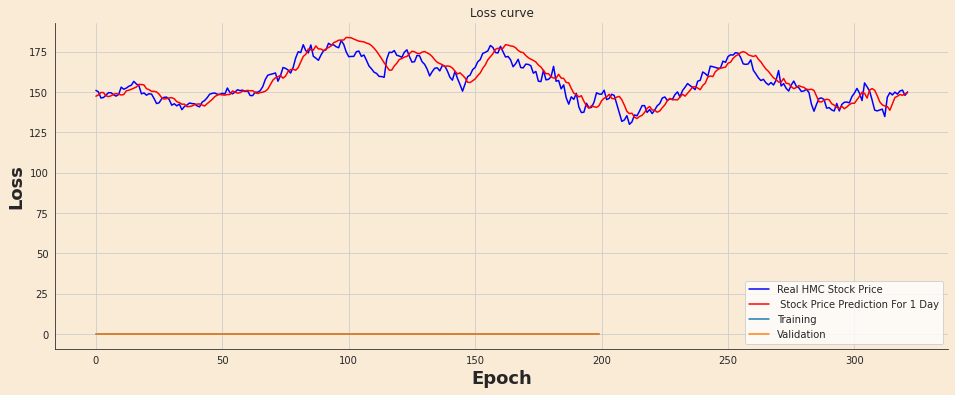

11/11 [==============================] - 0s 12ms/step


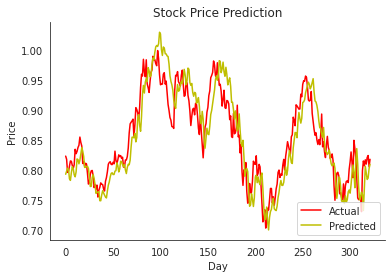

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


{'epochs': 200, 'batch_size': 64, 'learning rate': 0.001, 'sequence_length': 30, 'mae': 5.018409965941625, 'mape': 3.192504694218933, 'mdape': 2.9652167802446763, 'mse': 37.624116042414855, 'Model Name': 'Univariate LSTM-Exp3'}
Predicting for 2 days in future...
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 30, 1)             12        
                                                                 
 lstm_34 (LSTM)              (None, 30, 40)            6720      
                                                                 
 lstm_35 (LSTM)              (None, 35)                10640     
                                                                 
 dense_11 (Dense)            (None, 1)                 36        
                                                                 
Total params: 17,408
Trainable params: 17,408
Non-trai

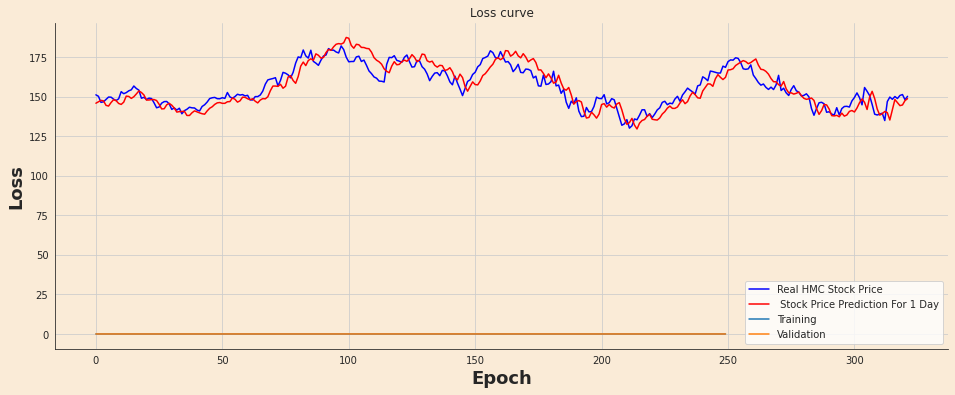

11/11 [==============================] - 0s 13ms/step


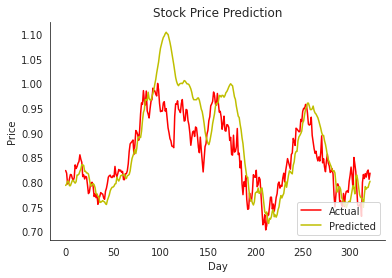

{'epochs': 250, 'batch_size': 64, 'learning rate': 0.001, 'sequence_length': 30, 'mae': 7.401319752568784, 'mape': 4.668007714495317, 'mdape': 3.6843248874446863, 'mse': 100.74549477616027, 'Model Name': 'Univariate LSTM-Exp3'}


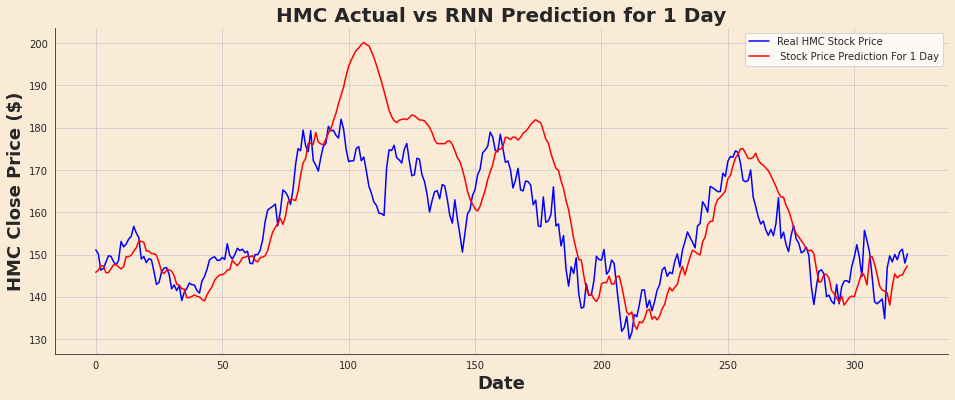

In [27]:
epoch_list=[50,100,150,200,250]
# Prediction Index
result_list =[]
learning_rate = [ 0.00100]
for epoch in epoch_list:
  random_seed()
  optimizer= optimizers.Adam(lr=0.00100)
  data=close_prices.copy()
  data=data['Close']
  scaler = MinMaxScaler()
  df_data=scaler.fit_transform(np.array(data).reshape(-1,1))
  X_train, y_train, X_test, y_test, n_training_samples = get_seq_data_temp(2, 30,0,df_data)

  result = fit_model_lstm_univariate(days_in_future=2, window_size=30,pred_index=0,learning_rate=0.00100,
                                   trainX=X_train,trainY=y_train,testX=X_test,testY=y_test,
                                   data=data,scaler=scaler,opt=optimizer,num_epochs=epoch)
  result['Model Name']= "Univariate LSTM-Exp3"
  result_list.append(result)
  print(result)

In [28]:
model1_univariate_exp3=pd.DataFrame(result_list)
model1_univariate_exp3

,epochs,batch_size,learning rate,sequence_length,mae,mape,mdape,mse,Model Name
0,50,64,0.001,30,9.024282,5.825096,5.214834,123.640056,Univariate LSTM-Exp3
1,100,64,0.001,30,9.971489,6.333557,4.931922,164.480216,Univariate LSTM-Exp3
2,150,64,0.001,30,4.494352,2.867503,2.413155,31.916082,Univariate LSTM-Exp3
3,200,64,0.001,30,5.018410,3.192505,2.965217,37.624116,Univariate LSTM-Exp3
4,250,64,0.001,30,7.401320,4.668008,3.684325,100.745495,Univariate LSTM-Exp3


# **Model Univariate -Experiment4- Different window size**

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Predicting for 2 days in future...
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 30, 1)             12        
                                                                 
 lstm_37 (LSTM)              (None, 30, 40)            6720      
                                                                 
 lstm_38 (LSTM)              (None, 35)                10640     
                                                                 
 dense_12 (Dense)            (None, 1)                 36        
                                                                 
Total params: 17,408
Trainable params: 17,408
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
46/46 [==============================] - 9s 129ms/step - loss: 0.0429 - val_loss: 0.3625
Epoch 2/250
46/46 [=====================

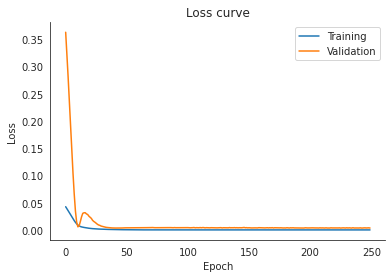

11/11 [==============================] - 0s 12ms/step


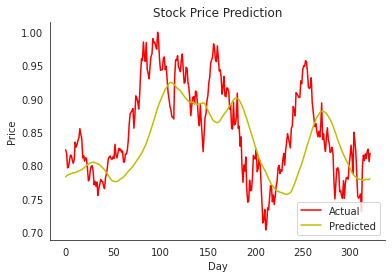

{'epochs': 250, 'batch_size': 64, 'learning rate': 0.001, 'sequence_length': 30, 'mae': 8.78349024612711, 'mape': 5.545239595425703, 'mdape': 4.505157106576592, 'mse': 116.28320647392246, 'optimizer': <keras.optimizers.optimizer_v2.adam.Adam object at 0x7f12d74c0e50>, 'Model Name': 'Univariate LSTM Exp4'}
Predicting for 2 days in future...
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 40, 1)             12        
                                                                 
 lstm_40 (LSTM)              (None, 40, 40)            6720      
                                                                 
 lstm_41 (LSTM)              (None, 35)                10640     
                                                                 
 dense_13 (Dense)            (None, 1)                 36        
                                         

In [ ]:
optimizer1= optimizers.Adam(lr=0.00001)

# Prediction Index
result_list =[]
sequence_length = [ 30,40,50,60,80,90]
for seq in sequence_length:
  random_seed()
  data=close_prices.copy()
  data=data['Close']
  scaler = MinMaxScaler()
  df_data=scaler.fit_transform(np.array(data).reshape(-1,1))
  X_train, y_train, X_test, y_test, n_training_samples = get_seq_data_temp(2, seq,0,df_data)
  df_data=scaler.fit_transform(np.array(data).reshape(-1,1))
  result = fit_model_lstm_univariate(days_in_future=2, window_size=seq,pred_index=0,learning_rate=0.00100,
                                   trainX=X_train,trainY=y_train,testX=X_test,testY=y_test,
                                   data=data,scaler=scaler,opt=optimizer1,num_epochs=100)
  result['optimizer']=optimizer
  result['Model Name']="Univariate LSTM Exp4"
  result_list.append(result)
  print(result)

In [ ]:
model1_univariate_exp4=pd.DataFrame(result_list)
model1_univariate_exp4


# **Model2: Multivariate LSTM **

In [ ]:
# Plot training & validation loss values
def plot_curve(history, epochs):
    training_loss = history.history["loss"]
    validation_loss = history.history["val_loss"]
    epochs_list = range(epochs)
    plt.plot(epochs_list, training_loss, label='Training')
    plt.plot(epochs_list, validation_loss, label='Validation')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss curve')
    plt.show()

In [ ]:
def train_lstm_multivariate(input_data_df,epochs, batch_size, optimizer, loss_func,sequence_length,x_train, y_train, x_test, y_test,scaler_pred):
    train_df = input_data_df.sort_values(by=['Date']).copy()
    #check if any features needs to be filtered out

    # We add a prediction column and set dummy values to prepare the data for scaling
    data_filtered_ext = train_df.copy()
    data_filtered_ext['Prediction'] = train_df['Close']

    # Get the number of rows in the data
    nrows = train_df.shape[0]

    # Transform the data by scaling each feature to a range between 0 and 1
    scaler = MinMaxScaler()
    np_data_scaled = scaler.fit_transform(train_df)
    # Creating a separate scaler that works on a single column for scaling predictions
    scaler_pred = MinMaxScaler()
    df_Close = pd.DataFrame(data_filtered_ext['Close'])
    np_Close_scaled = scaler_pred.fit_transform(df_Close)

    # Prediction Index
    index_Close = input_data_df.columns.get_loc("Close")

    x_train, y_train, x_test, y_test, n_training_samples = get_seq_data_temp(2,sequence_length ,index_Close,np_data_scaled)

    print(x_train.shape, x_test.shape)
    hl = [40,35]        
    # Configure the neural network model
    model = Sequential()

    # Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
    n_neurons = x_train.shape[1] * x_train.shape[2]
    input_shape=(x_train.shape[1], x_train.shape[2])

    model = Sequential()

    n_neurons = x_train.shape[1] * x_train.shape[2]
    input_shape=(x_train.shape[1], x_train.shape[2])
    model.add(LSTM(n_neurons, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(n_neurons, return_sequences=False))

    model.add(Dense(7))
    model.add(Dense(1))


    model.compile(optimizer = optimizer,loss=loss_func)

    history = model.fit(x_train, y_train, 
                        batch_size=batch_size, 
                        epochs=epochs,
                        validation_data=(x_test, y_test)
                      )
    
    print(model.summary())
                    
    plot_curve(history, epochs)

    # Get the predicted values
    y_pred_scaled = model.predict(x_test)
    #print("y_pred_scaled- shape",y_pred_scaled)

    # Unscale the predicted values
    y_pred = scaler_pred.inverse_transform(y_pred_scaled)
    y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))
    #print("y_pred -shape",y_pred.shape())
    #print("y_test_unscaled -shape",y_test_unscaled.shape())


    plot_data(y_test_unscaled,y_pred)
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test_unscaled, y_pred)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100

    # Median Absolute Percentage Error (MDAPE)
    mdape = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
    mse = mean_squared_error(y_test_unscaled, y_pred)
    

    return {
        'epochs': epochs,
        'batch_size': batch_size,
        'sequence_length': sequence_length,
        'mae': mae,
        'mape': mape,
        'mdape': mdape,
        'mse': mse,
        'optimizer':optimizer

    }

In [ ]:
close_prices

# **Model2- Multivariate LSTM- Experiment1-Different learning rates**

In [ ]:
loss_func = tf.keras.losses.MeanSquaredError()
sequence_length = 30
model_param=[]
epochs = 30
result=[]
batch_size = 16
learning_rates = [0.00001,0.001, 0.0001, 0.1,0.0010]
features= ['Close','High','Volume']
data_features = close_prices[['Close','High','Volume']]
for lr in learning_rates:
  random_seed()
  print('learning rate', lr)
  optimizer = tf.keras.optimizers.Adam(lr)
  data_unscaled = data_features.copy()

    # Transform the data by scaling each feature to a range between 0 and 1
  scaler = MinMaxScaler()
  np_data_scaled = scaler.fit_transform(data_unscaled)
    # Creating a separate scaler that works on a single column for scaling predictions

    # Prediction Index
  index_Close = data_unscaled.columns.get_loc("Close")


  x_train, y_train, x_test, y_test, n_training_samples = get_seq_data_temp(2, sequence_length,index_Close,np_data_scaled)
  result = train_lstm_multivariate(data_unscaled, epochs, batch_size, optimizer, loss_func, sequence_length,x_train, y_train, x_test, y_test,scaler)
  result['learning_rate']=lr

  result['Model Name']="MultiVariate LSTM Exp1"

  result['learning_rate'] = lr  
  model_param.append(result)
  

In [ ]:
model2_univariate_exp1=pd.DataFrame( model_param)
model2_univariate_exp1

# **Model2 -Multivariate LSTM Experiment2- Different optimizers**

In [ ]:
optimizer1= optimizers.Adam(lr=0.00100)
optimizer2= optimizers.SGD(lr=0.00100)
optimizer2=optimizers.Adagrad(lr=0.00100)
optimizer_list=[optimizer1,optimizer2,optimizer2]
# Prediction Index
result_list =[]


loss_func = tf.keras.losses.MeanSquaredError()
sequence_length = 30
model_param=[]
epochs = 30
result=[]
batch_size = 16
features= ['Close','High','Volume']
data_features = close_prices[['Close','High','Volume']]
for opt in optimizer_list:
  random_seed()
  data_unscaled = data_features.copy()

    # Transform the data by scaling each feature to a range between 0 and 1
  scaler = MinMaxScaler()
  np_data_scaled = scaler.fit_transform(data_unscaled)
    # Creating a separate scaler that works on a single column for scaling predictions

    # Prediction Index
  index_Close = data_unscaled.columns.get_loc("Close")


  x_train, y_train, x_test, y_test, n_training_samples = get_seq_data_temp(2, sequence_length,index_Close,np_data_scaled)
  result = train_lstm_multivariate(data_unscaled, epochs, batch_size, opt, loss_func, sequence_length,x_train, y_train, x_test, y_test,scaler)
  result['optimizer']=opt
  result['Model Name']="Multivariate LSTM-Exp2"

  #result['learning_rate'] = lr  
  model_param.append(result)
  


In [ ]:
model2_univariate_exp2=pd.DataFrame( model_param)
model2_univariate_exp2

# **Model2 -Multivariate LSTM Experiment3- Different Epochs**

In [ ]:
num_epochs=[100,200,300,400]
loss_func = tf.keras.losses.MeanSquaredError()

model_param=[]
epochs = 10
result=[]
batch_size = 16
lr = 0.00100
features= ['Close','High','Volume']
data_features = close_prices[['Close','High','Volume']]
for epoch in num_epochs:
  random_seed()
  print('learning rate', 0.000001)
  optimizer = tf.keras.optimizers.Adam(lr)
  data_unscaled = data_features.copy()

    # Transform the data by scaling each feature to a range between 0 and 1
  scaler = MinMaxScaler()
  np_data_scaled = scaler.fit_transform(data_unscaled)
    # Creating a separate scaler that works on a single column for scaling predictions

    # Prediction Index
  index_Close = data_unscaled.columns.get_loc("Close")


  x_train, y_train, x_test, y_test, n_training_samples = get_seq_data_temp(2, 30,index_Close,np_data_scaled)
  result = train_lstm_multivariate(data_unscaled, epoch, batch_size, optimizer, loss_func, 30,x_train, y_train, x_test, y_test,scaler)
  result['Model Name']="Multivariate LSTM Exp3"

  result['learning_rate'] = lr  
  model_param.append(result)

In [ ]:
model2_univariate_exp3=pd.DataFrame( model_param)
model2_univariate_exp3.sort_values(by='mdape')

# **Model2: Multivariate LSTM- Exp4- Sequence length **

In [ ]:
sequence_lengths=[2,10,20,30,40,50,60]
loss_func = tf.keras.losses.MeanSquaredError()

model_param=[]
epochs = 300
result=[]
batch_size = 16
lr = 0.00001
features= ['Close','High','Volume']
data_features = close_prices[['Close','High','Volume']]
for sequence in sequence_lengths:
  random_seed()
  print('learning rate', 0.000001)
  optimizer = tf.keras.optimizers.Adam(lr)
  data_unscaled = data_features.copy()

    # Transform the data by scaling each feature to a range between 0 and 1
  scaler = MinMaxScaler()
  np_data_scaled = scaler.fit_transform(data_unscaled)
    # Creating a separate scaler that works on a single column for scaling predictions

    # Prediction Index
  index_Close = data_unscaled.columns.get_loc("Close")


  x_train, y_train, x_test, y_test, n_training_samples = get_seq_data_temp(2, sequence,index_Close,np_data_scaled)
  result = train_lstm_multivariate(data_unscaled, epochs, batch_size, optimizer, loss_func, sequence,x_train, y_train, x_test, y_test,scaler)
  result['Model Name']="Multivariate LSTM Exp4"

  model_param.append(result)

In [ ]:

multivariate_lstm_exp4 = pd.DataFrame(model_param)
multivariate_lstm_exp4.sort_values(by='mdape')

In [ ]:
result_final = pd.DataFrame()

result_final = result_final.append(model2_univariate_exp1)
result_final = result_final.append(model2_univariate_exp2)
result_final = result_final.append(model2_univariate_exp3)
result_final = result_final.append(model2_univariate_exp4)


# **Model 3: Multivariate GRU **

In [ ]:
from tensorflow.python.ops.math_ops import graph_util

def train_gru_multivariate(input_data_df,epochs, batch_size, optimizer, loss_func,sequence_length,x_train, y_train, x_test, y_test,scaler_pred):
    train_df = input_data_df.sort_values(by=['Date']).copy()
    #check if any features needs to be filtered out

    # We add a prediction column and set dummy values to prepare the data for scaling
    data_filtered_ext = train_df.copy()
    data_filtered_ext['Prediction'] = train_df['Close']

    # Get the number of rows in the data
    nrows = train_df.shape[0]

    # Transform the data by scaling each feature to a range between 0 and 1
    scaler = MinMaxScaler()
    np_data_scaled = scaler.fit_transform(train_df)
    # Creating a separate scaler that works on a single column for scaling predictions
    scaler_pred = MinMaxScaler()
    df_Close = pd.DataFrame(data_filtered_ext['Close'])
    np_Close_scaled = scaler_pred.fit_transform(df_Close)

    # Prediction Index
    index_Close = input_data_df.columns.get_loc("Close")

    x_train, y_train, x_test, y_test, n_training_samples = get_seq_data_temp(1,sequence_length ,index_Close,np_data_scaled)

    print(x_train.shape, x_test.shape)
    hl = [40,35]        
    # Configure the neural network model
    model = Sequential()

    # Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
    n_neurons = x_train.shape[1] * x_train.shape[2]
    input_shape=(x_train.shape[1], x_train.shape[2])

    model = Sequential()

    n_neurons = x_train.shape[1] * x_train.shape[2]
    input_shape=(x_train.shape[1], x_train.shape[2])
    model.add(GRU(n_neurons, return_sequences=True, input_shape=input_shape))
    model.add(GRU(n_neurons, return_sequences=False))

    model.add(Dense(7))
    model.add(Dense(1))


    model.compile(optimizer = optimizer,loss=loss_func)

    history = model.fit(x_train, y_train, 
                        batch_size=batch_size, 
                        epochs=epochs,
                        validation_data=(x_test, y_test)
                      )
    
    print(model.summary())
                    
    plot_curve(history, epochs)

    # Get the predicted values
    y_pred_scaled = model.predict(x_test)
    #print("y_pred_scaled- shape",y_pred_scaled)

    # Unscale the predicted values
    y_pred = scaler_pred.inverse_transform(y_pred_scaled)
    y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))
    #print("y_pred -shape",y_pred.shape())
    #print("y_test_unscaled -shape",y_test_unscaled.shape())


    plot_data(y_test_unscaled,y_pred)
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test_unscaled, y_pred)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100

    # Median Absolute Percentage Error (MDAPE)
    mdape = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
    mse = mean_squared_error(y_test_unscaled, y_pred)
    

    return {
        'epochs': epochs,
        'batch_size': batch_size,
        'learning_rate':lr,
        'optimizer':optimizer,
        'sequence_length': sequence_length,
        'mae': mae,
        'mape': mape,
        'mdape': mdape,
        'mse': mse,

    }

# **Model 3-Multivariate GRU-Experiment1- Different Leanring rates**

In [ ]:
sequence_lengths=[2,10,20,30,40,50,60]
loss_func = tf.keras.losses.MeanSquaredError()

model_param=[]
epochs = 10
result=[]
batch_size = 16
learning_rates = [0.00001,0.001, 0.0001, 0.1]
features= ['Close','High','Volume']
data_features = close_prices[['Close','High','Volume']]
for lr in learning_rates:
  random_seed()
  epochs=50
  optimizer = tf.keras.optimizers.Adam(lr)
  data_unscaled = data_features.copy()

    # Transform the data by scaling each feature to a range between 0 and 1
  scaler = MinMaxScaler()
  np_data_scaled = scaler.fit_transform(data_unscaled)
    # Creating a separate scaler that works on a single column for scaling predictions

    # Prediction Index
  index_Close = data_unscaled.columns.get_loc("Close")


  x_train, y_train, x_test, y_test, n_training_samples = get_seq_data_temp(1, sequence,index_Close,np_data_scaled)
  result = train_gru_multivariate(data_unscaled, epochs, batch_size, optimizer, loss_func, sequence,x_train, y_train, x_test, y_test,scaler)
  result['learning_rate']=lr
  result['Model Name']="Multivariate GRU-Exp1"
  #result['learning_rate'] = lr  
  model_param.append(result)

In [ ]:
model3_multivariate_gru_epx1 = pd.DataFrame(model_param)
model3_multivariate_gru_epx1.sort_values(by='mdape')

# **Model3-Multivariate GRY-Experiment2-Different optimizers**

In [ ]:
sequence_lengths=[2,10,20,30,40,50,60]
loss_func = tf.keras.losses.MeanSquaredError()
optimizer1= optimizers.Adam(lr=0.00100)
optimizer2= optimizers.SGD(lr=0.00100)
optimizer2=optimizers.Adagrad(lr=0.00100)
optimizer_list=[optimizer1,optimizer2,optimizer2]

model_param=[]
epochs = 10
result=[]
batch_size = 16
lr = 0.00100
features= ['Close','High','Volume']
data_features = close_prices[['Close','High','Volume']]
for opt in optimizer_list:
  random_seed()
  epochs=50
  optimizer = tf.keras.optimizers.Adam(lr)
  data_unscaled = data_features.copy()

    # Transform the data by scaling each feature to a range between 0 and 1
  scaler = MinMaxScaler()
  np_data_scaled = scaler.fit_transform(data_unscaled)
    # Creating a separate scaler that works on a single column for scaling predictions

    # Prediction Index
  index_Close = data_unscaled.columns.get_loc("Close")


  x_train, y_train, x_test, y_test, n_training_samples = get_seq_data_temp(1, sequence,index_Close,np_data_scaled)
  result = train_gru_multivariate(data_unscaled, epochs, batch_size, opt, loss_func, sequence,x_train, y_train, x_test, y_test,scaler)
  result['learning_rate']=lr
  result['Model Name']="Multivariate GRU-Exp2"

  #result['learning_rate'] = lr  
  model_param.append(result)

In [ ]:
model3_multivariate_gru_epx2 = pd.DataFrame(model_param)
model3_multivariate_gru_epx2.sort_values(by='mdape')

# **Model3- Multivariate GRU Experiment3-Different Epochs**

In [ ]:
sequence_lengths=[2,10,20,30,40,50,60]
loss_func = tf.keras.losses.MeanSquaredError()
optimizer= optimizers.Adam(lr=0.00100)


model_param=[]
epochs = [10,50,100,150,200,250]
result=[]
batch_size = 16
lr = 0.00100
features= ['Close','High','Volume']
data_features = close_prices[['Close','High','Volume']]
for epoch in epochs:
  random_seed()
  epochs=50
  optimizer = tf.keras.optimizers.Adam(lr)
  data_unscaled = data_features.copy()

    # Transform the data by scaling each feature to a range between 0 and 1
  scaler = MinMaxScaler()
  np_data_scaled = scaler.fit_transform(data_unscaled)
    # Creating a separate scaler that works on a single column for scaling predictions

    # Prediction Index
  index_Close = data_unscaled.columns.get_loc("Close")


  x_train, y_train, x_test, y_test, n_training_samples = get_seq_data_temp(1, 60,index_Close,np_data_scaled)
  result = train_gru_multivariate(data_unscaled, epoch, batch_size, optimizer, loss_func, 60,x_train, y_train, x_test, y_test,scaler)
  result['learning_rate']=lr
  result['Model Name']="Multivariate GRU-Exp3"

  #result['learning_rate'] = lr  
  model_param.append(result)

In [ ]:
model3_multivariate_gru_epx3 = pd.DataFrame(model_param)
model3_multivariate_gru_epx3.sort_values(by='mdape')

# **Model3-Multivariate GRU-Experiment4- Sequence Length**

In [ ]:
sequence_lengths=[2,10,20,30,40,50,60]
loss_func = tf.keras.losses.MeanSquaredError()
model_param=[]
epochs = [10,50,100,150,200,250]
result=[]
batch_size = 16
lr = 0.00100
features= ['Close','High','Volume']
data_features = close_prices[['Close','High','Volume']]
for seq in sequence_lengths:
  random_seed()
  epoch=150
  optimizer = tf.keras.optimizers.Adam(lr)
  data_unscaled = data_features.copy()

    # Transform the data by scaling each feature to a range between 0 and 1
  scaler = MinMaxScaler()
  np_data_scaled = scaler.fit_transform(data_unscaled)
    # Creating a separate scaler that works on a single column for scaling predictions

    # Prediction Index
  index_Close = data_unscaled.columns.get_loc("Close")


  x_train, y_train, x_test, y_test, n_training_samples = get_seq_data_temp(1, seq,index_Close,np_data_scaled)
  result = train_gru_multivariate(data_unscaled, epoch, batch_size, optimizer, loss_func, seq,x_train, y_train, x_test, y_test,scaler)
  result['learning_rate']=lr
  result['Model Name']="Multivariate GRU-Exp4"

  #result['learning_rate'] = lr  
  model_param.append(result)

In [ ]:
model3_multivariate_gru_epx4 = pd.DataFrame(model_param)
model3_multivariate_gru_epx4.sort_values(by='mdape')